# Exercise 1: Classical Machine Learning
This is the first example of our workshop. Our main objectives are:
1. Gaining some insights on how to process tabular data and perform some analytics.
2. Data cleaning and feature engineering
3. Training, testing, validation sets. What they are and wht they matter.
4. Classical ML algorithms and when to use them.


## Libraries
Python scripts typically start with library `import` commands. Libraries are what make python so precious for machine learning. They include a lot useful functionality that help us not code everything from scratch. Let's import some of the most famous libraries that we will use in this notebook.

**Note:**
If you are running this notebook on Google Colab, it already comes with a decent package of libraries for machine learning. For missing libraries, please install them using

```
!pip install library_name
```
Some of these libraries are listed as follows:

| Library                | Description                                                                           | Documentation                                   |
|------------------------|---------------------------------------------------------------------------------------|-------------------------------------------------|
| numpy                  | Library for efficient numerical operations.                                           | [numpy.org](https://numpy.org/)                |
| pandas                 | A good resource for processing tabular data.                                          | [pandas.pydata.org](https://pandas.pydata.org/)|
| matplotlib.pyplot      | Famous library for plotting and visualization.                                        | [matplotlib.org](https://matplotlib.org/)      |
| seaborn                | Statistical data visualization.                                                       | [seaborn.pydata.org](https://seaborn.pydata.org/)|
| re                     | Native in python for finding patterns in text data (regular expressions).             | [docs.python.org/3/library/re.html](https://docs.python.org/3/library/re.html)  |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Loading the dataset
This dataset is adopted from the [Universoty of Toronto's website](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). The data is originally published by:

Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

A clean version fo the dataset can also be downloaded from [Kaggle](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/input). Please download the dataset and place it in the running directory of this notebook. If on Colab, please upload the dataset to the Files section.  

We will copy the features from the website in `str` format to practice regex and later use the abbraviations as feature names.  


In [ ]:
# ref: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
feature_str= """\
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""
print(feature_str)

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's


Let's split the long string by each line. `\n` represent a new line character.The output is something we call a list. In Python, a list is a versatile and commonly used data structure that allows you to store a collection of values. Lists are ordered, mutable (meaning you can change their contents), and can contain elements of different data types, such as numbers, strings, or even other lists. Lists are defined using  brackets [ ].  

In [ ]:
feature_lines = feature_str.split('\n')
feature_lines

['CRIM - per capita crime rate by town',
 'ZN - proportion of residential land zoned for lots over 25,000 sq.ft.',
 'INDUS - proportion of non-retail business acres per town.',
 'CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
 'NOX - nitric oxides concentration (parts per 10 million)',
 'RM - average number of rooms per dwelling',
 'AGE - proportion of owner-occupied units built prior to 1940',
 'DIS - weighted distances to five Boston employment centres',
 'RAD - index of accessibility to radial highways',
 'TAX - full-value property-tax rate per $10,000',
 'PTRATIO - pupil-teacher ratio by town',
 'B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 'LSTAT - % lower status of the population',
 "MEDV - Median value of owner-occupied homes in $1000's"]

In [ ]:
feature_lines[3]

'CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)'

Dictionaries are data structures in Python that store key-value pairs. They are defined using curly braces { } and allow fast access to values based on their unique keys. We will create a dictionary where keys are the abbraviations of each feature and values are the actual descriptions.

In [ ]:
data_column_dict={}
for line in feature_lines:
    # method 1
    # print(line.split(' - ')) # try "-" first
    line_split_list = line.split(' - ')
    feature = line_split_list[0]
    description = "-".join(line_split_list[1:])
    # method 2, Regular Expressions or regex
    # print(re.search('-',line).span())
    # first_dash_loc = re.search('-',line).span()[0]
    # feature = line[0:first_dash_loc-1]
    # description = line[first_dash_loc+2:]

    data_column_dict[feature] = description
data_column_dict

{'CRIM': 'per capita crime rate by town',
 'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.',
 'INDUS': 'proportion of non-retail business acres per town.',
 'CHAS': 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
 'NOX': 'nitric oxides concentration (parts per 10 million)',
 'RM': 'average number of rooms per dwelling',
 'AGE': 'proportion of owner-occupied units built prior to 1940',
 'DIS': 'weighted distances to five Boston employment centres',
 'RAD': 'index of accessibility to radial highways',
 'TAX': 'full-value property-tax rate per $10,000',
 'PTRATIO': 'pupil-teacher ratio by town',
 'B': '1000(Bk-0.63)^2 where Bk is the proportion of blacks by town',
 'LSTAT': '% lower status of the population',
 'MEDV': "Median value of owner-occupied homes in $1000's"}

In [ ]:
data_column_dict.keys()

dict_keys(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [ ]:
data_column_dict['CRIM']

'per capita crime rate by town'

Now we will use pandas to load the dataset, which has a csv format (comma seperated variables). make sure the 'housing.csv' file is accecible to the notebook as explained before.

In [ ]:
dataset = pd.read_csv('housing.csv')

By default, the imported dataset does not look to be what we were expecting:

In [ ]:
dataset

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


We need to take a look at the documentation and see if we can do things differently.
The documentation for `read_csv` can be found by googling the name of the function/method/class in google. Let's try that [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).


**Side note**

Can we ask ChatGPT to solve our problem? What are the pros and cons?


In [ ]:
dataset = pd.read_csv('housing.csv',names=data_column_dict.keys(),sep='\s+')
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


`dataset` is called a `pandas` dataframe. dataframes come with a lot of nice features. For example, we can quickly get insights on some important statistics of our dataset.

In [ ]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


It is also possible to add a new column to a dataframe. Here, we like to practice that by creating a new column called PRNG for price range. To do this, we want to copy the median house price value `MEDV` and assing values with the following rules:
* \$: Houses that are priced less than 25% quartile
* \$\$: Houses between 25% to median
* \$\$\$: Median to 75% quartile
* \$\$\$\$: More than 75%

In [ ]:
# create a new column
dataset['PRNG']=dataset['MEDV']
q_25 = dataset['MEDV'].quantile(0.25)
q_50 = dataset['MEDV'].quantile(0.5)
q_75 = dataset['MEDV'].quantile(0.75)
dataset.loc[dataset['MEDV']<q_25,'PRNG']='\$'
dataset.loc[(dataset['MEDV']>=q_25) & (dataset['MEDV']<q_50),'PRNG']='\$\$'
dataset.loc[(dataset['MEDV']>=q_50) & (dataset['MEDV']<q_75),'PRNG']='\$\$\$'
dataset.loc[dataset['MEDV']>=q_75,'PRNG']='\$\$\$\$'

In [ ]:
dataset[['PRNG','MEDV']]

,PRNG,MEDV
0,\$\$\$,24.0
1,\$\$\$,21.6
2,\$\$\$\$,34.7
3,\$\$\$\$,33.4
4,\$\$\$\$,36.2
...,...,...
501,\$\$\$,22.4
502,\$\$,20.6
503,\$\$\$,23.9
504,\$\$\$,22.0


## Data Visualization
Data visualization is crucial in data science projects as it provides a visual lens to understand data distribution, revealing patterns, imbalances, and outliers that may be missed through raw data analysis alone. These visual insights empower data scientists to make informed decisions, refine models, and ensure the accuracy and robustness of their analyses, ultimately enhancing the quality of results.

Let's gain some more insights about this dataset by doing some visulaizations. In this case we will try [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) funcionality of `seaborn`.

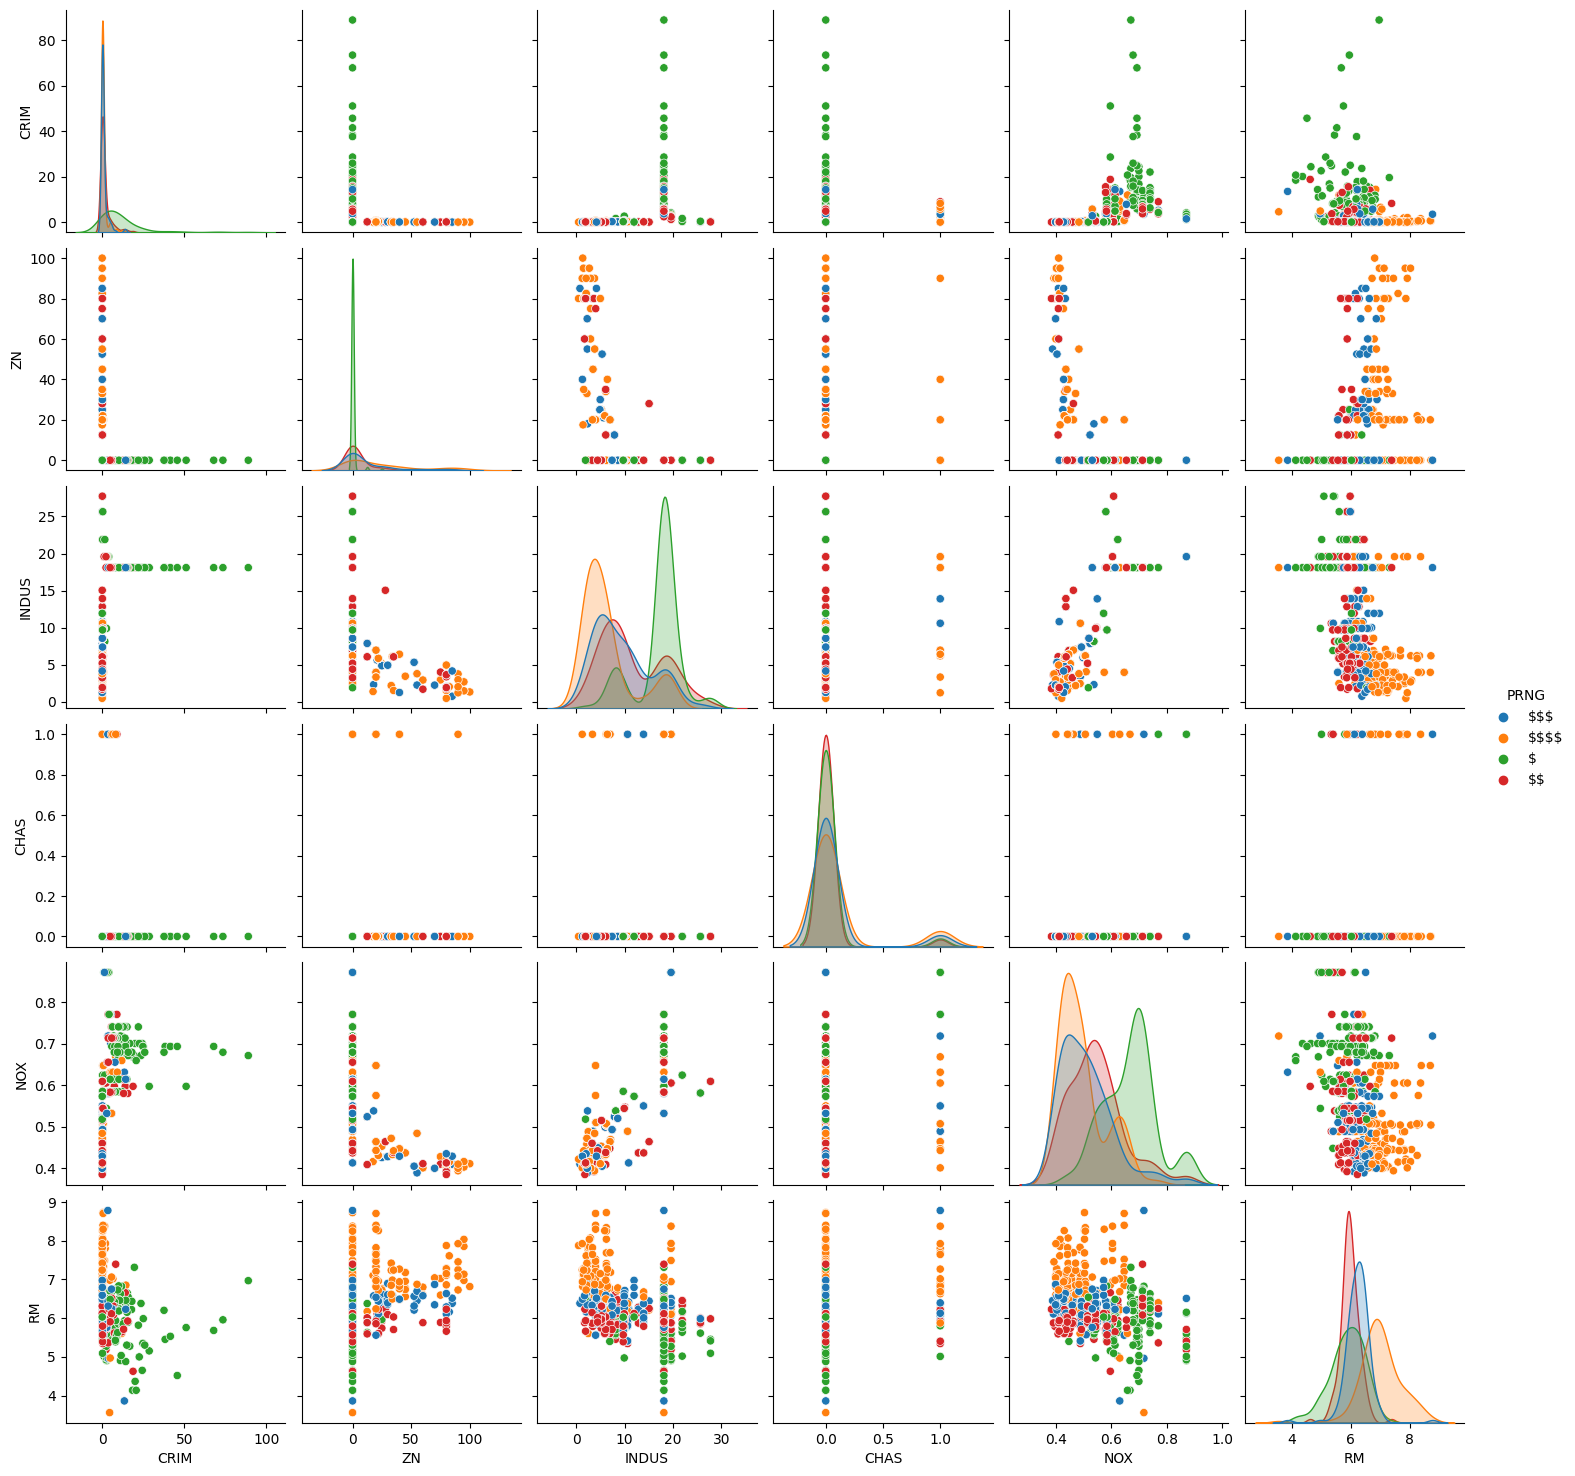

In [ ]:
column_list = list(data_column_dict.keys())
fig = sns.pairplot(dataset[column_list[0:6]+['PRNG']],hue='PRNG')
# save to file
fig.savefig('pairplot.png')

Real-world datasets are almost always imbalanced to some level. Being aware of these imbalances is important because they affect the quality of estimates we get from our ML models. A histogram plot can be a good way of just visually getting an idea about your dataset without inpsection the tabular dataset.

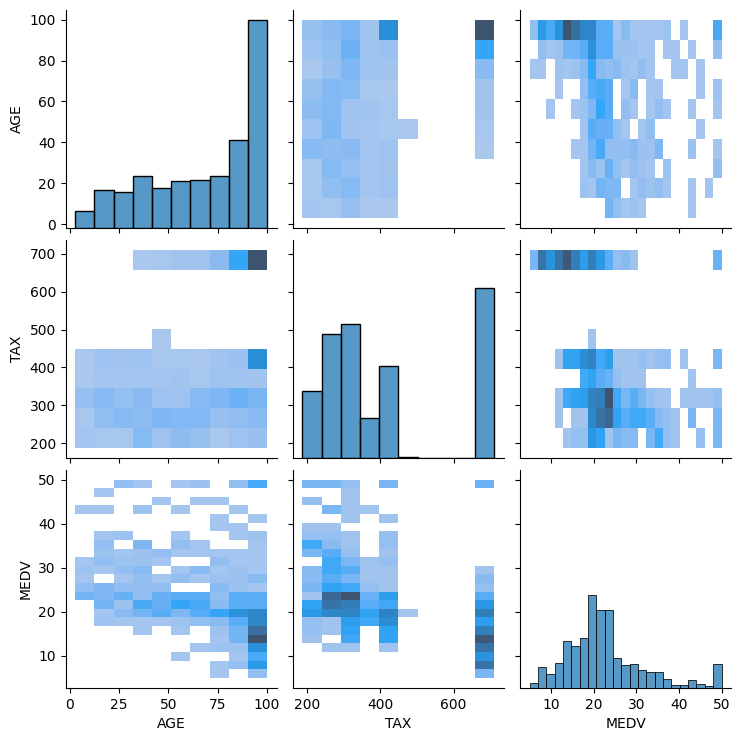

In [ ]:
vis_keys = ['AGE','TAX','MEDV']
sns.pairplot(dataset[vis_keys], kind="hist")

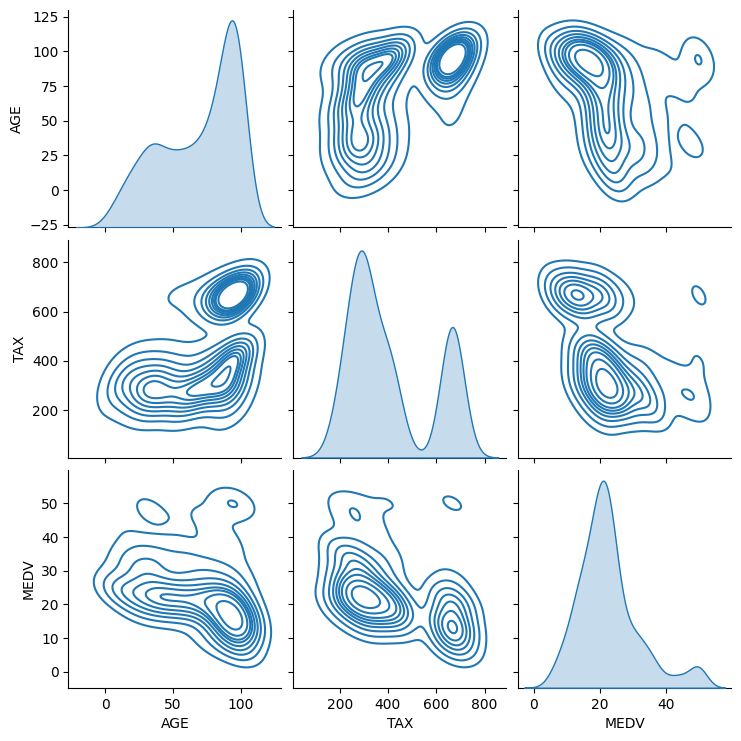

In [ ]:
fig = sns.pairplot(dataset[vis_keys],kind='kde') # KDE: Kernel density estimate

# Classical machine learning algorithms
In the realm of machine learning, deep learning models are cutting-edge and excel at handling complex data like images, audio, and natural language. However, they come with high computational costs and demand extensive data for reliable results. In many cases, classical, simpler algorithms can provide more dependable pattern recognition on smaller datasets, making them a practical starting point for newcomers to machine learning.

[scikit-learn](https://scikit-learn.org/stable/) is one of the most extensive ML libraries that helps us train such ML models and contains a very large collection of popular ML algorithms. WE will start by importing some useful libraries from sklearn.

For this excercise, let us also decide what are our input and predicted output feature.

In [ ]:
print(f"{'MEDV'}: {data_column_dict['MEDV']}")
print(f"{'NOX'}: {data_column_dict['NOX']}")

MEDV: Median value of owner-occupied homes in $1000's
NOX: nitric oxides concentration (parts per 10 million)


In [ ]:
Target_column = 'MEDV'
Input_feature_columns = [feat for feat in data_column_dict.keys() if feat not in ['MEDV','NOX']]

X = np.array(dataset[Input_feature_columns])
y = np.array(dataset[Target_column])
# Dataset summary:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (506, 12)
y shape: (506,)


In [ ]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

Splitting a dataset into training, testing, and validation sets is essential to assess and optimize the performance of machine learning models. The training set is used to train the model, the validation set helps fine-tune hyperparameters and prevent [overfitting](https://www.mathworks.com/discovery/overfitting.html), and the testing set provides an unbiased evaluation of the model's generalization performance on unseen data, ensuring its reliability in real-world applications. In real world problems, what out for dataset imbalance and make sure both your testing and training set are good representatives of real world data. `scikit-learn` will help up to creata a simple random split of the dataset.

In [ ]:
# split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Data normalization is crucial in machine learning because it scales and transforms features into a consistent range, preventing certain features from dominating the learning process due to their larger scales, and ensuring that the algorithm can converge more effectively. It also aids in improving model performance, making it easier for the algorithm to identify meaningful patterns in the data.

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
# Fit only to the training data
scaler_X.fit(X_train)
scaler_y.fit(y_train.reshape(-1,1))
# Now apply the transformations to the data:
X_train_norm = scaler_X.transform(X_train)
X_test_norm = scaler_X.transform(X_test)

y_train_norm = scaler_y.transform(y_train.reshape(-1,1))

In [ ]:
y_train[0]

25.3

In [ ]:
y_train_norm.shape

(404, 1)


## No Free Lunch 🍔
The No Free Lunch Theoremit's crucial to choose the right algorithm based on the specific characteristics of your data and the nature of your task. in machine learning states that there is no one-size-fits-all algorithm or model that works best for every problem. Just like there's no universally perfect lunch, there's no universally perfect machine learning approach. Different algorithms excel in different situations, so when solving a problem, it's crucial to choose the right algorithm based on the specific characteristics of your data and the nature of your task.See [this article](https://machinelearningmastery.com/no-free-lunch-theorem-for-machine-learning/) to learn more about this theroem.

As a part of our first excersise, I ask you go to [this page](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning), and pick a different regression model. To show you how it is done, we will try a [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) as an example.

In [ ]:
# reg_model = svm.SVR()
reg_model = DecisionTreeRegressor() # try setting a max_depth=2 value as a hyperparameter
reg_model.fit(X_train_norm,y_train_norm.reshape(-1,))

NameError: ignored

In [ ]:
y_pred_train_norm = reg_model.predict(X_train_norm).reshape(-1,1)
y_pred_train = scaler_y.inverse_transform(y_pred_train_norm)

y_pred_test_norm = reg_model.predict(X_test_norm).reshape(-1,1)
y_pred_test = scaler_y.inverse_transform(y_pred_test_norm)

It is recommended to both visualize your model's predictions and simultaneosly measure performance metrics. Visualizations can help us detect a model's worse predictions while performance metrics help us systematically assess the a model accuracy and optimize its reliability.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].scatter(y_train,y_pred_train_norm)
ax[0].set_xlabel('True Values')
ax[0].set_ylabel('Predictions')
ax[0].set_title('Training Data')

ax[1].scatter(y_test,y_pred_test)
ax[1].set_xlabel('True Values')
ax[1].set_ylabel('Predictions')
ax[1].set_title('Testing Data')

plt.show()
plt.close()

In [ ]:
# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_train):7.3f}")
print(f"Testing MAE: {mean_absolute_error(y_test, y_pred_test):7.3f}")
print(f"Training R2: {r2_score(y_train, y_pred_train):7.3f}")
print(f"Testing R2: {r2_score(y_test, y_pred_test):7.3f}")


## Explainable machine learning
The [SHAP](https://shap-lrjball.readthedocs.io/en/latest/index.html) (SHapley Additive exPlanations) library is a tool in the field of machine learning that helps to explain the predictions of complex models. It calculates the contribution of each input feature to a model's output, providing insights into why a particular prediction was made. Explainable AI is important because it enhances trust and transparency in machine learning systems by allowing users to understand the reasoning behind model decisions.

In [ ]:
!pip install shap
import shap

In [ ]:
# If running the notebook locally, there might be issues installing SHAP. Google colab seems to be running well.
# get numpy version
# import numpy as np
# print(f"numpy version: {np.__version__}")

# import numba
# print(f"numba version: {numba.__version__}")

# # uninstall numpy
# !pip uninstall numpy
# # install numpy 1.25
# !pip install numpy==1.25

In [ ]:
X_importance = X_test

In [ ]:
# Explain model predictions using shap library:
explainer = shap.TreeExplainer(reg_model)
shap_values = explainer.shap_values(X_importance)

In [ ]:
# Plot summary_plot as barplot:
shap.summary_plot(shap_values, X_importance, plot_type='bar', feature_names=Input_feature_columns)